# Canaries
## Creating an histogram from each of the sarifo rtb time series
(time,qps_cap,qps_eff,avg_lat,max_lat,timeouts,bids)

Parsing data from safirortb.log

In [1]:
!./get_logs.sh 172.18.5.194 5000000 canary
!./get_logs.sh 172.18.6.6 5000000 silver
!./parse_logs.sh canary
!./parse_logs.sh silver
!ls ../data/

canary.csv  canary.log	silver.csv  silver.log


In [2]:
import numpy as np
import os
from stats_util import Type, get_serie
import math

path = os.getcwd()
path 
canary_ds = np.loadtxt(path + "/../data/canary.csv", delimiter=",")
canary_ds = np.delete(canary_ds, [1,], axis=1)

silver_ds = np.loadtxt(path + "/../data/silver.csv", delimiter=",")
silver_ds = np.delete(silver_ds, [1,], axis=1)


ValueError: Wrong number of columns at line 2650

In [18]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline
figure(num=None, figsize=(15, 7), dpi=180, facecolor='w', edgecolor='k')
canary = get_serie(canary_ds, Type.qps_cap, None, None)
silver = get_serie(silver_ds, Type.qps_cap, None, None)

<Figure size 2700x1260 with 0 Axes>

(360.6993763473976, 43.069197617456126)

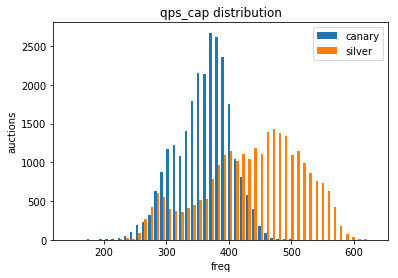

In [19]:
plt.hist([canary, silver], bins=50, label=['canary', 'silver'])
plt.title('qps_cap distribution')
plt.xlabel('freq')
plt.ylabel('auctions');
plt.legend(loc='upper right')
canary.mean(),math.sqrt(canary.var())

(174.87969664305513, 60.46734218355054)

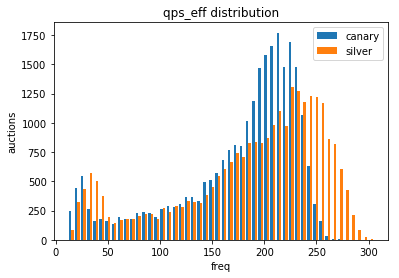

In [20]:
canary = get_serie(canary_ds, Type.qps_eff, None, None)
silver = get_serie(silver_ds, Type.qps_eff, None, None)
plt.hist([canary, silver], bins=50, label=['canary', 'silver'])
plt.title('qps_eff distribution')
plt.xlabel('freq')
plt.ylabel('auctions');
plt.legend(loc='upper right')
canary.mean(),math.sqrt(canary.var())

(0.0028120033877425316, 0.00037103189245395846)

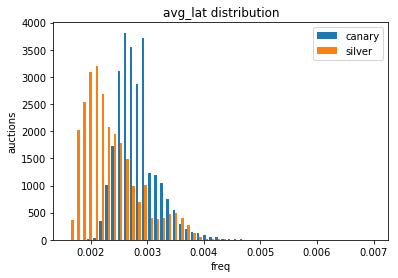

In [21]:
canary = get_serie(canary_ds, Type.avg_lat, None, None)
silver = get_serie(silver_ds, Type.avg_lat, None, None)
plt.hist([canary, silver], bins=50, label=['canary', 'silver'])
plt.title('avg_lat distribution')
plt.xlabel('freq')
plt.ylabel('auctions');
plt.legend(loc='upper right')
canary.mean(),math.sqrt(canary.var())

(7.401832460732984, 7.354406758340619)

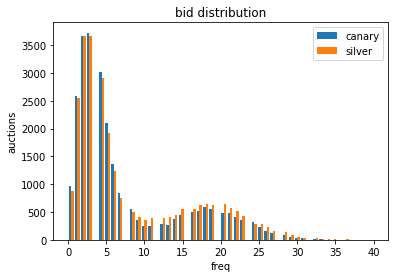

In [22]:
canary = get_serie(canary_ds, Type.bids, None, None)
silver = get_serie(silver_ds, Type.bids, None, None)
plt.hist([canary, silver], bins=50, label=['canary', 'silver'])
plt.title('bid distribution')
plt.xlabel('freq')
plt.ylabel('auctions');
plt.legend(loc='upper right')
canary.mean(),math.sqrt(canary.var())

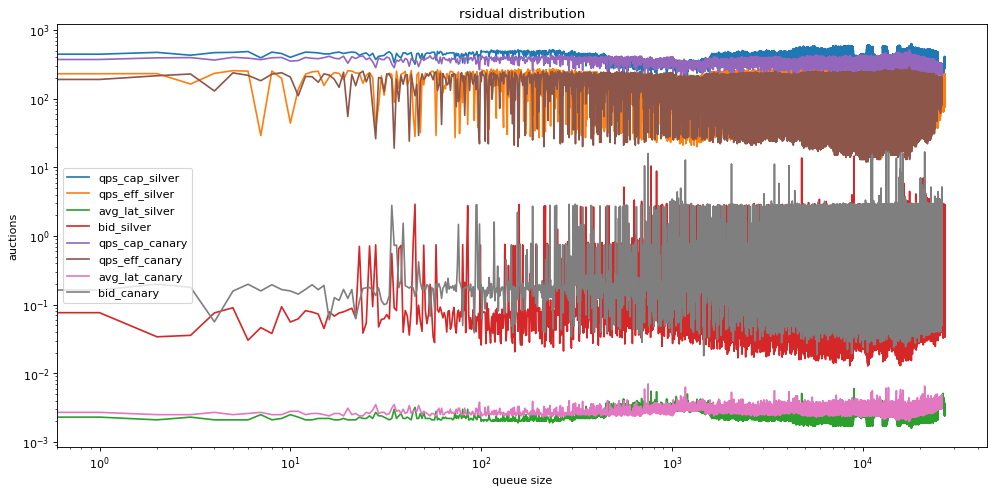

In [23]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline
figure(num=None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')

plt.plot(silver_ds[:,1], label="qps_cap_silver")
plt.plot(silver_ds[:, 2], label="qps_eff_silver")
plt.plot(silver_ds[:, 3], label="avg_lat_silver")
plt.plot(silver_ds[:, 4], label="bid_silver")

plt.plot(canary_ds[:,1], label="qps_cap_canary")
plt.plot(canary_ds[:, 2], label="qps_eff_canary")
plt.plot(canary_ds[:, 3], label="avg_lat_canary")
plt.plot(canary_ds[:, 4], label="bid_canary")

#plt.hist(dataset,bins=50)
plt.gca().set_xscale("log", nonposx='clip')
plt.gca().set_yscale("log", nonposy='clip')
plt.title('rsidual distribution')
plt.xlabel('queue size')
plt.ylabel('auctions');
plt.legend()
plt.show()